In [ ]:
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import datasets, utils
import numpy as np

def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:test_nums], y_test[:test_nums]
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.
    y_train = utils.to_categorical(y_train)#.astype(np.int32)
    y_test = utils.to_categorical(y_test)
        
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
print("train_data",x_train.shape,y_train.shape)
print("test_data",x_test.shape,y_test.shape)
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test), scale=3) 
    

train_data (60000, 28, 28) (60000,)
test_data (10000, 28, 28) (10000,)
(20000, 28, 28, 1) (20000, 10)
(3333, 28, 28, 1) (3333, 10)


In [8]:
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf
filter_dims = 128

model = models.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=(filter_dims//4), kernel_size=(3,3), padding="same", activation="relu", name="conv_1"))
model.add(layers.MaxPooling2D(pool_size=(2,2), name="pool_1"))
model.add(layers.Dropout(rate=0.3, name="drop_1"))
model.add(layers.Conv2D(filters=(filter_dims//2), kernel_size=(3,3), padding="same", activation="relu", name="conv_2"))
model.add(layers.MaxPooling2D(pool_size=(2,2), name="pool_2"))
model.add(layers.Dropout(rate=0.3, name="drop_2"))
model.add(layers.Conv2D(filters=filter_dims, kernel_size=(3,3), padding="same", activation="relu", name="conv_3"))
model.add(layers.MaxPooling2D(pool_size=(2,2), name="pool_3"))
model.add(layers.Dropout(rate=0.3, name="drop_3"))
model.add(layers.Flatten(name="flatten"))
model.add(layers.Dense(units=filter_dims, activation="relu", name="dense_1"))
model.add(layers.Dense(units=(filter_dims//2), activation="relu", name="dense_2"))
model.add(layers.Dense(units=(filter_dims//4), activation="relu", name="dense_3"))
model.add(layers.Dense(units=10, activation="softmax", name="outputs"))

optimizer = optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
drop_2 (Dropout)             (None, 7, 7, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 128)        

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6, batch_size=128)

Train on 20000 samples, validate on 3333 samples
Epoch 1/6
20000/20000 [==============================] - 16s 817us/sample - loss: 0.6480 - accuracy: 0.7761 - val_loss: 0.1367 - val_accuracy: 0.9568
Epoch 2/6
20000/20000 [==============================] - 17s 826us/sample - loss: 0.1864 - accuracy: 0.9460 - val_loss: 0.1050 - val_accuracy: 0.9664
Epoch 3/6
20000/20000 [==============================] - 16s 779us/sample - loss: 0.1496 - accuracy: 0.9564 - val_loss: 0.0709 - val_accuracy: 0.9760
Epoch 4/6
20000/20000 [==============================] - 16s 784us/sample - loss: 0.1453 - accuracy: 0.9589 - val_loss: 0.1324 - val_accuracy: 0.9631
Epoch 5/6
20000/20000 [==============================] - 16s 781us/sample - loss: 0.1313 - accuracy: 0.9624 - val_loss: 0.0866 - val_accuracy: 0.9763
Epoch 6/6
20000/20000 [==============================] - 16s 785us/sample - loss: 0.1314 - accuracy: 0.9620 - val_loss: 0.0741 - val_accuracy: 0.9766


In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

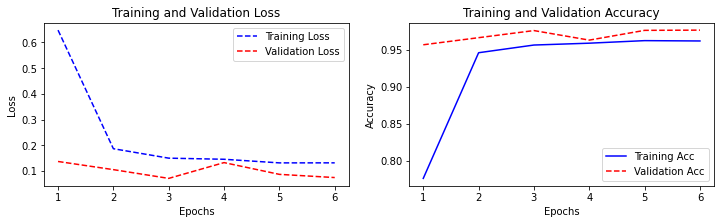

In [12]:
import matplotlib.pyplot as plt

def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

y_preds: [1 2 9 4 1 1]
y_labels [1 2 9 4 1 1]


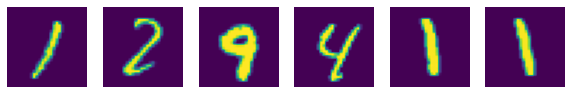

In [23]:
indexes = [99,696,1399,-1399,-696,-99]
x_preds = x_train[indexes]
y_labels = y_train[indexes]
y_preds = model.predict(x_preds)
y_labels = np.argmax(y_labels, axis=1)
y_preds = np.argmax(y_preds, axis=1)
print("y_preds:",y_preds)
print("y_labels",y_labels)
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,(i+1))
    plt.axis("off")
    plt.imshow(x_preds[i])
plt.show()   